In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [2]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [10]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
im_1_path = 'D:/mlai/carplate.jfif'
im_2_path = 'D:/mlai/image_digit.jfif'


In [12]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [13]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [14]:
result

[([[93, 119], [147, 119], [147, 135], [93, 135]],
  'CCC444',
  0.5561226550152698)]

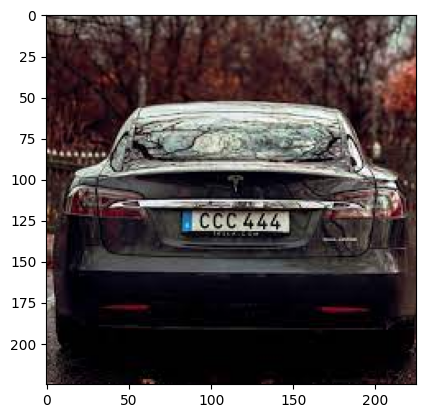

In [15]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

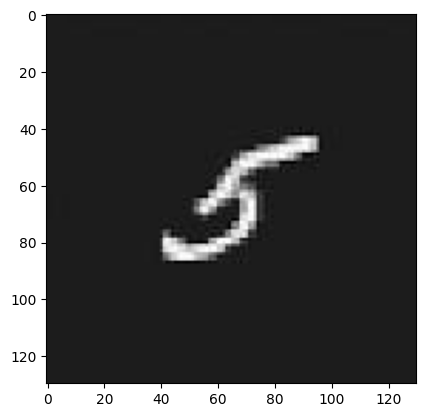

In [16]:
img_2 = cv2.imread(im_2_path)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

In [17]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 5
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'D:/mlai/output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: CCC444 (Probability: 0.56)


<Figure size 640x480 with 0 Axes>

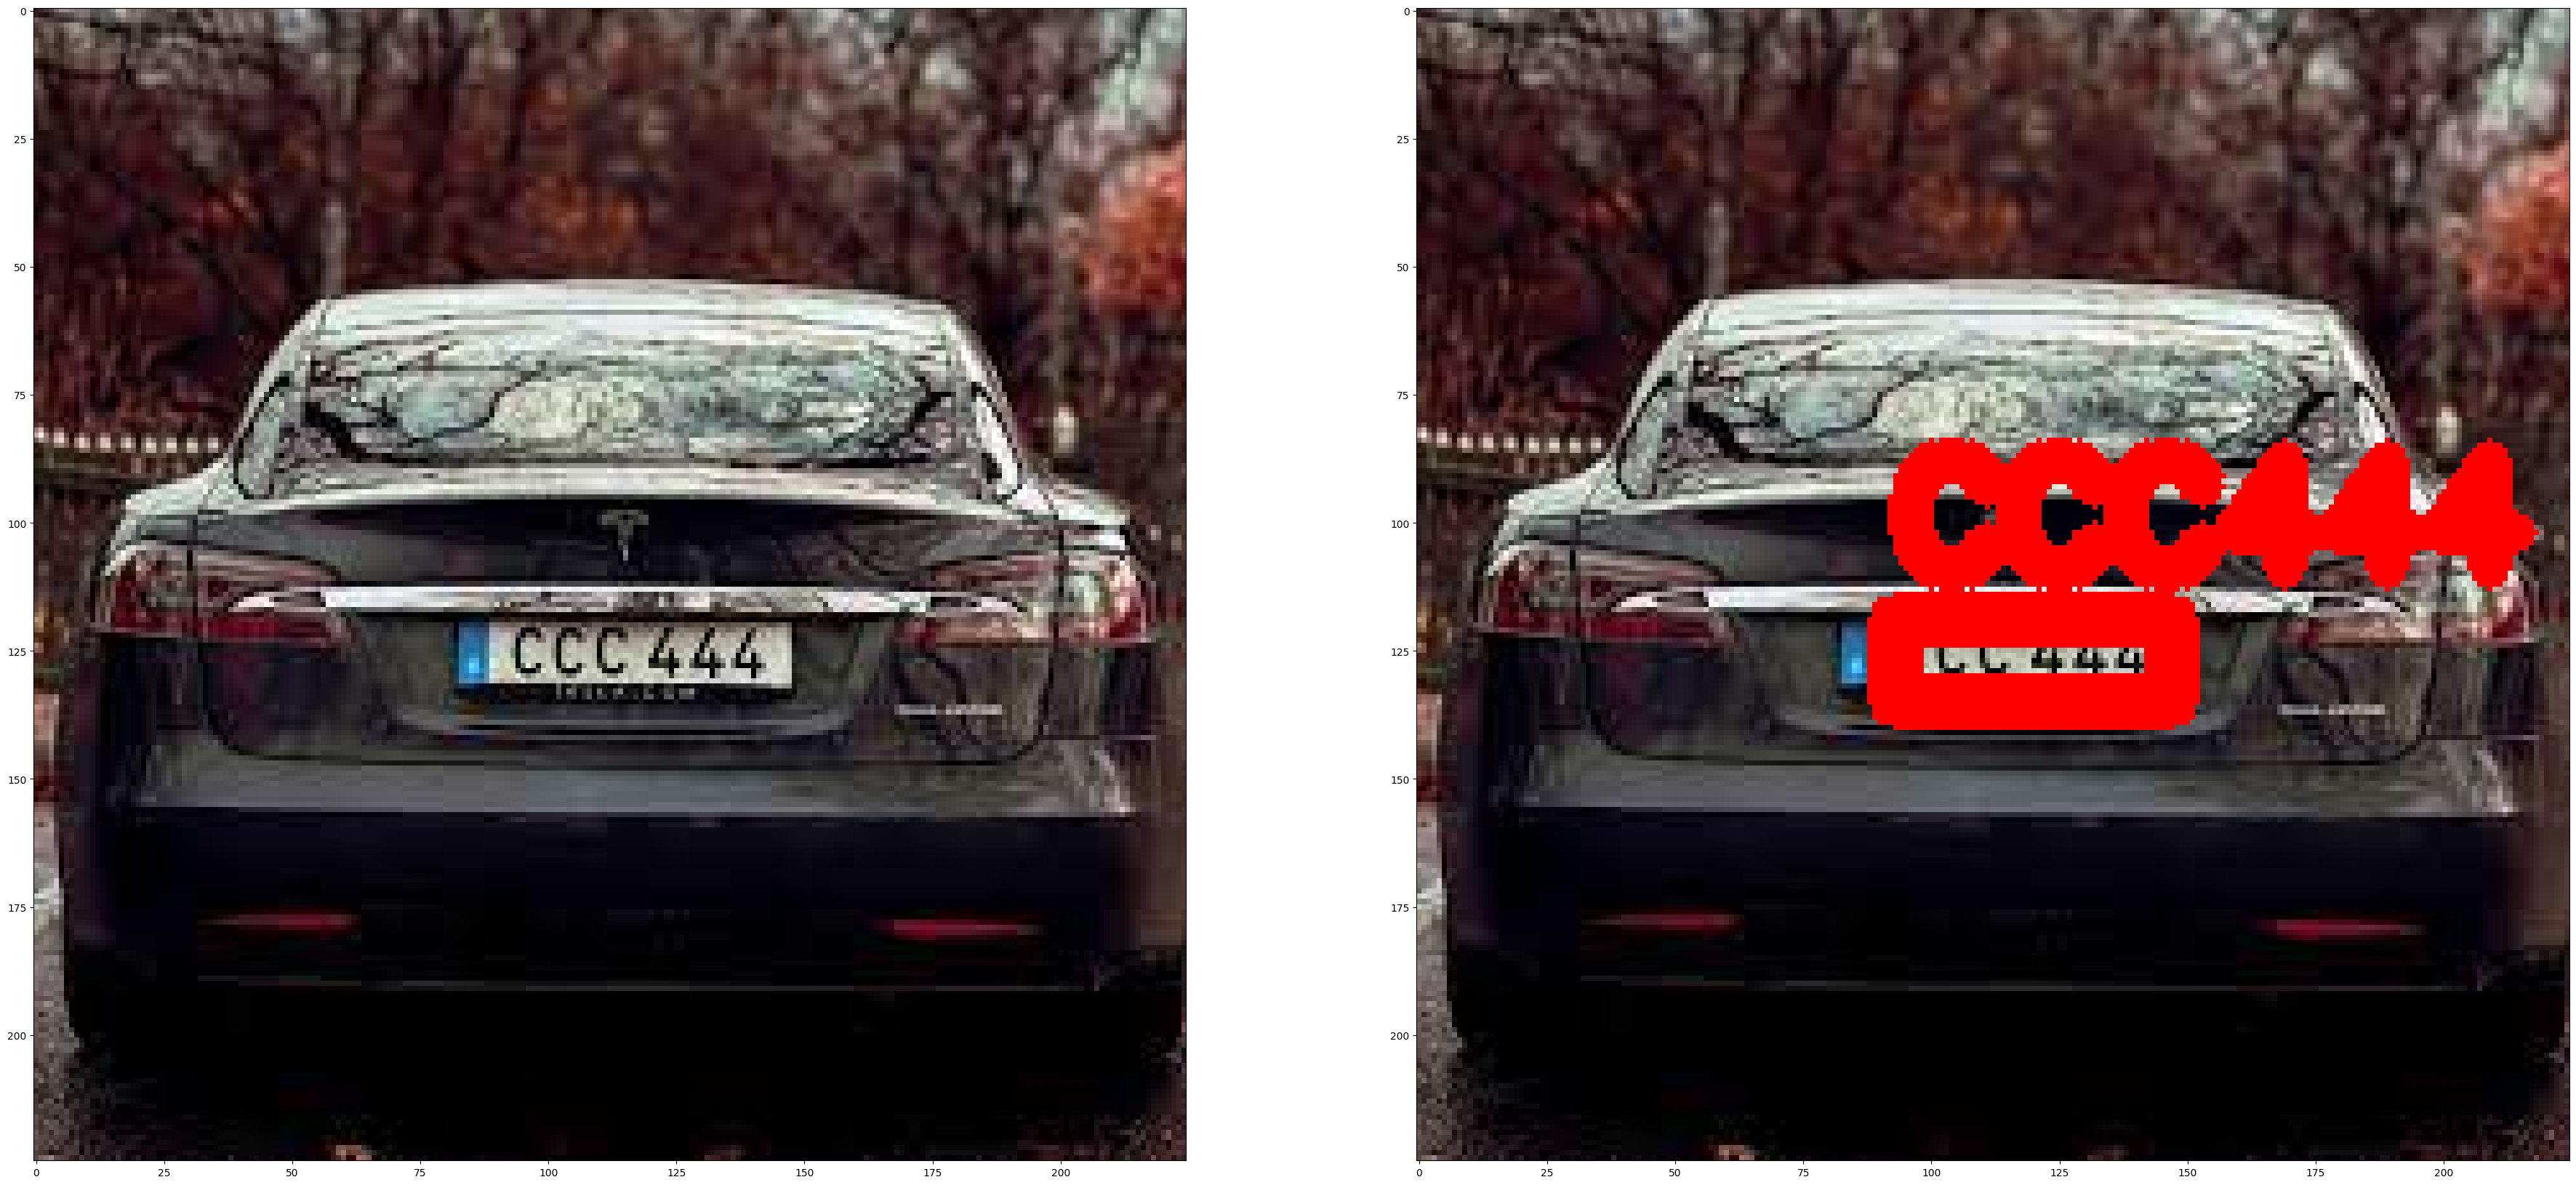

In [18]:
overlay_ocr_text(im_1_path, 'carplate')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: 5 (Probability: 1.00)


<Figure size 640x480 with 0 Axes>

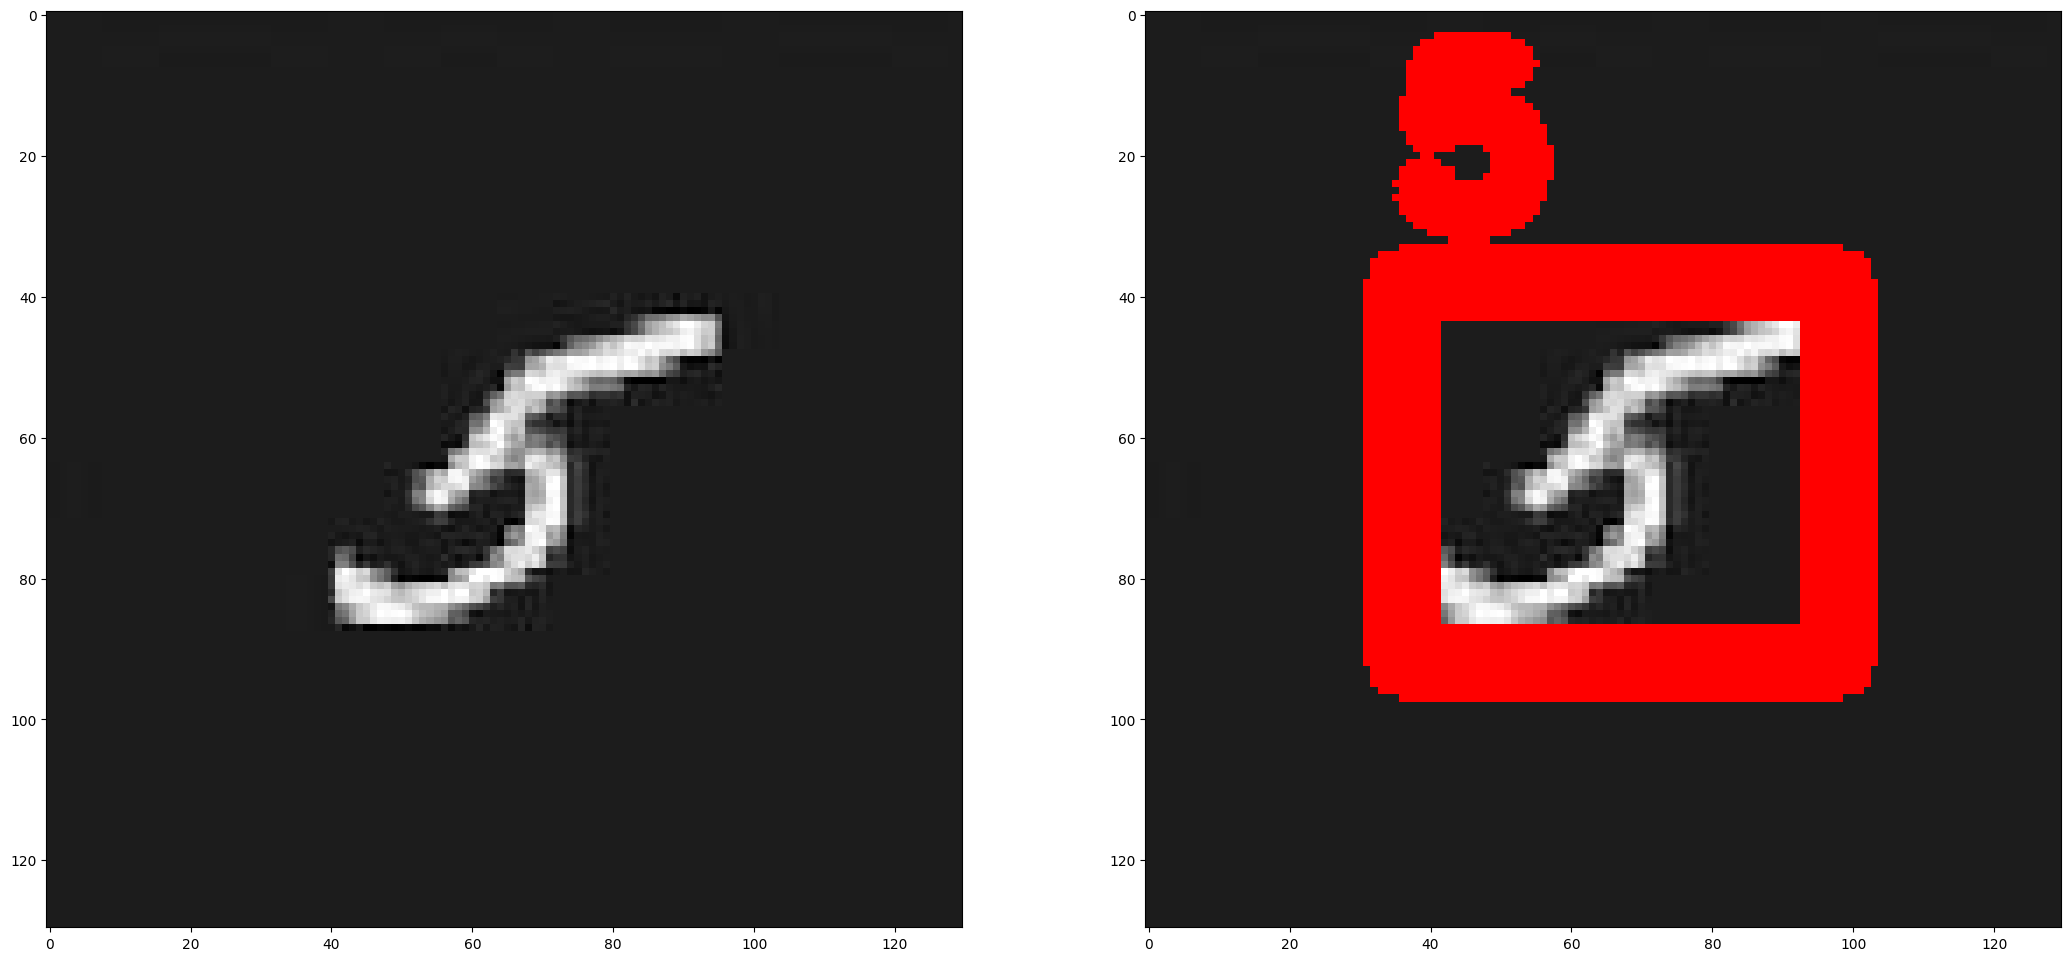

In [19]:
overlay_ocr_text(im_3_path, 'digits')

# Text-to-speech recognition

In [20]:
!pip install pyttsx3

In [21]:
result = recognize_text(im_1_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


CCC444 


In [22]:
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()

In [23]:
result = recognize_text(im_2_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


5 


In [24]:
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()